In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras

In [ ]:
# Taking the training and testing data from keras MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data(path="mnist.npz")

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


7


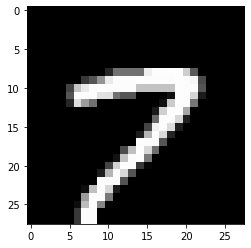

In [ ]:
i = 123
plt.imshow(x_train[i] , cmap = 'gray')
print(y_train[i])

In [ ]:
x_train[0].shape

(28, 28)

In [ ]:
28*28

784

In [ ]:
# Loss Function : Sparse Categorical Cross Entropy
# NN Architecture:
# Input: Flatten
# Hidden: 500 , AF = 'relu'
# Output: 10 , AF= 'Softmax' 

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(500,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",optimizer='Adam',metrics=['accuracy'])

In [ ]:
history = model.fit(x_train,y_train,epochs=5,validation_data=(x_test,y_test))

Epoch 1/5
1875/1875 [==============================] - 6s 2ms/step - loss: 7.9168 - accuracy: 0.8660 - val_loss: 0.4595 - val_accuracy: 0.9253
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3254 - accuracy: 0.9378 - val_loss: 0.3275 - val_accuracy: 0.9314
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2757 - accuracy: 0.9414 - val_loss: 0.5050 - val_accuracy: 0.9155
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2722 - accuracy: 0.9434 - val_loss: 0.3087 - val_accuracy: 0.9407
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2251 - accuracy: 0.9514 - val_loss: 0.6261 - val_accuracy: 0.9376


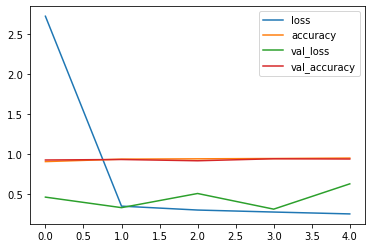

In [ ]:
import pandas as pd
loss = pd.DataFrame(model.history.history)
loss.plot()

In [ ]:
# Focusing on loss and val_loss, our model is looking pretty decent , not much of a over fitting but we can improve this by adding a Drop-out layer.

In [ ]:
# Predicting from x_train
y_pred = model.predict(x_test) 
y_pred = np.argmax(y_pred,axis=1)  
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
# classification_report(y_pred,y_test)
confusion_matrix(y_pred,y_test)

array([[ 963,    0,    2,    0,   12,    5,   80,    5,    5,   10],
       [   0, 1124,    6,    0,    4,    2,    4,   14,    6,    6],
       [   1,    2,  972,   11,    2,    0,    0,   17,    4,    1],
       [   1,    0,   12,  936,    0,   13,    1,    2,    3,   18],
       [   0,    1,    6,    3,  936,    0,   12,    5,   12,   22],
       [   3,    1,    4,   21,    2,  848,   68,    1,   13,    3],
       [   3,    0,    1,    2,    5,    9,  787,    0,    1,    0],
       [   1,    0,    7,    5,    1,    2,    1,  965,    3,    5],
       [   7,    6,   21,   20,   10,    9,    5,    9,  920,   19],
       [   1,    1,    1,   12,   10,    4,    0,   10,    7,  925]])

In [ ]:
accuracy_score(y_pred,y_test)*100

93.76

In [ ]:
# We get 94.15 % of accuracy which is not bad.

In [ ]:
# Now we will apply Drop-out layer to improve our model

In [ ]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(500,activation='relu'))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(10,activation='softmax'))

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",optimizer='Adam',metrics=['accuracy'])
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)
model.fit(x_train,y_train,epochs = 5 ,validation_data=(x_test,y_test),callbacks=[early_stop])

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 7.1268 - accuracy: 0.8616 - val_loss: 0.3876 - val_accuracy: 0.9306
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3629 - accuracy: 0.9234 - val_loss: 0.4032 - val_accuracy: 0.9170
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3366 - accuracy: 0.9268 - val_loss: 0.3270 - val_accuracy: 0.9450
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3043 - accuracy: 0.9355 - val_loss: 0.3576 - val_accuracy: 0.9388
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3013 - accuracy: 0.9356 - val_loss: 0.2948 - val_accuracy: 0.9380


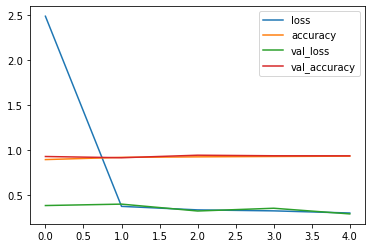

In [ ]:
loss = pd.DataFrame(model.history.history)
loss.plot()

In [ ]:
y_pred = model.predict(x_test) 
y_pred = np.argmax(y_pred,axis=1)  
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
confusion_matrix(y_pred,y_test)

array([[ 946,    0,    4,    2,    0,    3,    4,    0,    7,    3],
       [   0, 1097,    5,    0,    0,    1,    2,    2,    2,    3],
       [   3,    2,  973,    3,   14,    1,   22,   36,    7,    0],
       [   1,    2,   12,  943,    0,   47,    0,    7,    7,   14],
       [   0,    1,    1,    0,  891,    1,    7,    2,    3,    7],
       [   0,    2,    2,   18,    1,  783,    6,    0,   10,    2],
       [  13,    5,    1,    0,   21,    7,  907,    0,    3,    1],
       [   2,    2,    5,    3,    7,    2,    0,  960,    2,    5],
       [  15,   24,   29,   31,   13,   41,   10,    8,  926,   20],
       [   0,    0,    0,   10,   35,    6,    0,   13,    7,  954]])

In [ ]:
accuracy_score(y_pred,y_test)*100

93.8

In [ ]:
# 94.08

In [ ]:
model.save("MNIST.hdf5")

In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
a = np.array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 253, 253, 212, 135, 132,  16,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])

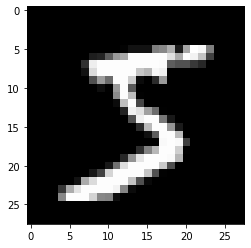

In [ ]:
plt.imshow(a,cmap='gray')

In [ ]:
model_new = keras.models.load_model('MNIST.hdf5')

In [ ]:
op = model_new.predict(a.reshape(1,28,28))
op

array([[8.6853037e-29, 2.1181903e-26, 3.1347055e-38, 7.1618124e-03,
        2.6804186e-22, 9.9283820e-01, 1.3623888e-34, 1.9619495e-29,
        8.3364157e-19, 2.2656797e-10]], dtype=float32)

In [ ]:
!pip install streamlit --quiet
!pip install pyngrok==4.1.1 --quiet
!pip install streamlit-drawable-canvas --quiet
from pyngrok import ngrok

     |████████████████████████████████| 7.0MB 8.4MB/s 
     |████████████████████████████████| 4.6MB 56.7MB/s 
     |████████████████████████████████| 163kB 54.8MB/s 
     |████████████████████████████████| 112kB 61.3MB/s 
     |████████████████████████████████| 81kB 10.1MB/s 
     |████████████████████████████████| 122kB 62.6MB/s 
     |████████████████████████████████| 71kB 9.8MB/s 
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.5.0 which is incompatible.
     |████████████████████████████████| 1.3MB 9.3MB/s 


In [ ]:
%%writefile app.py
import streamlit as st
from streamlit_drawable_canvas import st_canvas
import numpy as np
from tensorflow import keras
import cv2

st.title('My Digit Recognizer')
# Create a canvas component
canvas_result = st_canvas(
    fill_color="#000000",  # Fixed fill color with some opacity
    stroke_width=10,
    stroke_color='#ffffff',
    background_color="#000000",
    height=150,width=150,
    drawing_mode='freedraw',
    key="canvas",
)

model_new = keras.models.load_model('MNIST.hdf5')
img = cv2.resize(canvas_result.image_data.astype('uint8'), (28, 28))
rescaled = cv2.resize(img, (150, 150), interpolation=cv2.INTER_NEAREST)
test_x = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
op = model_new.predict(test_x.reshape(1,28,28))

if canvas_result.image_data is not None:
    st.image(canvas_result.image_data)

if st.button('Predict'):
    st.write(f'result: {np.argmax(op[0])}')
    st.bar_chart(op[0])


Writing app.py


In [ ]:
!nohup streamlit run app.py &
url = ngrok.connect(port='8501')
print(url)

nohup: appending output to 'nohup.out'
http://cc395bba5851.ngrok.io
